In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder

Import DataSet

In [5]:
fitness=pd.read_csv("C:\\UOC pdf\\3rd Year\\MachineLearning-01\\final_project\\healthFitnessDataset.csv")

In [6]:
X=fitness.drop(columns=['fitness_level'])
Y=fitness['fitness_level']

Split Data Training and Testing

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,random_state=42)
X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
Y_train = Y_train.reset_index(drop = True)
Y_test = Y_test.reset_index(drop = True)

Scale Numerical Variables

In [10]:
scaler=StandardScaler()

num_cols=X_train.select_dtypes(include='number').columns
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])

In [11]:
##categorical Data Encoding using Ordinal and One-Hot Encoding

##Ordinal Endcoding
# Define the order manually
intensity_order = ['Low','Medium','High']
# Create encoder
ordinal_encoder = OrdinalEncoder(categories=[intensity_order])
# Fit and transform
X_train['intensity']= ordinal_encoder.fit_transform(X_train[['intensity']])

In [12]:
##Nominal Endcoding
# Create encoder
onehot_encoder = OneHotEncoder(sparse_output=False)

# Fit and transform
encoded_data = onehot_encoder.fit_transform(X_train[['gender','activity_type','smoking_status']])

# Convert the encoded array to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(['gender', 'activity_type', 'smoking_status']))

# Combine with the original dataset
X_train = X_train.drop(['gender','activity_type','smoking_status'], axis=1)
X_train = pd.concat([X_train.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

In [13]:
##Scaling,Endcoding Testing set

##Scaling
X_test[num_cols]=scaler.fit_transform(X_test[num_cols])

In [14]:
##Endcoding categorical variables

###Nominal Endcoding
# Create encoder
onehot_encoder = OneHotEncoder(sparse_output=False)

# Fit and transform
encoded_data = onehot_encoder.fit_transform(X_test[['gender','activity_type','smoking_status']])

# Convert the encoded array to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(['gender', 'activity_type', 'smoking_status']))

# Combine with the original dataset
X_test = X_test.drop(['gender','activity_type','smoking_status'], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

In [15]:
###Ordinal Endcoding
# Define the order manually
intensity_order = ['Low','Medium','High']
# Create encoder
ordinal_encoder = OrdinalEncoder(categories=[intensity_order])
# Fit and transform
X_test['intensity']= ordinal_encoder.fit_transform(X_test[['intensity']])

Fit Lasso Regression Model

In [17]:
##01 without Hyperparameter Tunning
# --- FIT LASSO MODEL ---
# Set alpha manually (for example, alpha = 1.0)
lasso = Lasso(alpha=1.0, random_state=42)
lasso.fit(X_train,Y_train)

# Coefficients
coef = lasso.coef_
# Print coefficients
print("Lasso coefficients:\n", coef)
# How many features are selected?
print(f"Number of selected features: {(coef != 0).sum()} out of {len(coef)}")

Lasso coefficients:
 [-0.          0.          0.          0.          0.          0.
 -0.         -0.         -0.          0.         -0.          3.78644119
  0.         -0.          0.          0.          0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
  0.          0.         -0.          0.        ]
Number of selected features: 1 out of 28


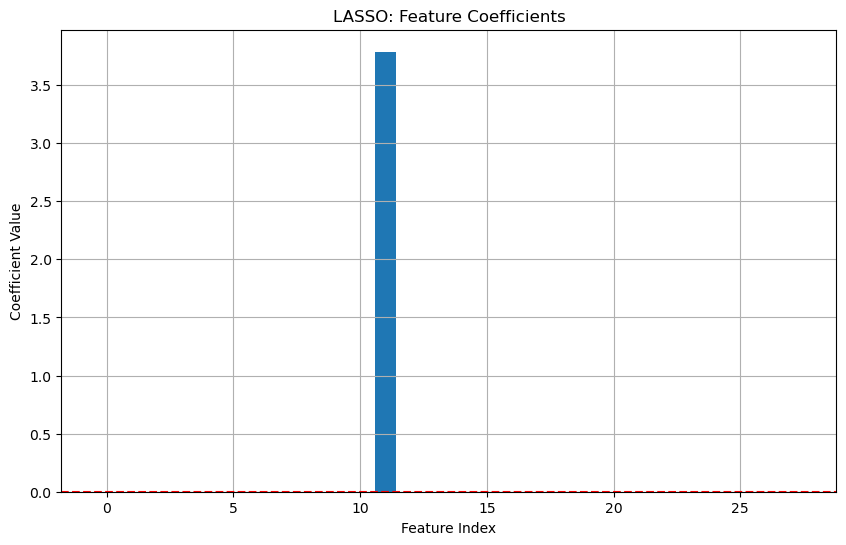

In [18]:
plt.figure(figsize=(10,6))
plt.bar(range(len(coef)), coef)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('LASSO: Feature Coefficients')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()

In [19]:
Y_pred=lasso.predict(X_test)
Y_train_pred=lasso.predict(X_train)

In [20]:
mean_abs_test_mse=mean_absolute_error(Y_test,Y_pred)
mean_abs_train_mse=mean_absolute_error(Y_train,Y_train_pred)

print("Testing MSE:",mean_abs_test_mse)
print("Training MSE:",mean_abs_train_mse)

Testing MSE: 2.3613365643703546
Training MSE: 2.3133668102936227


In [21]:
mse_test=mean_squared_error(Y_pred,Y_test)
mse_train=mean_squared_error(Y_train_pred,Y_train)

print("Mean Square Error(Testing):",mse_test)
print("Mean Square Error(Training):",mse_train)

Mean Square Error(Testing): 8.507418092514094
Mean Square Error(Training): 8.254520390912159


In [22]:
print("R2 square:",r2_score(Y_test,Y_pred))

R2 square: 0.7231008937192647


Fit Lasso with Hyperparameter Tunning(GridSearch Method)

In [24]:
param_grid={
    'alpha': np.logspace(-4, 1, 50)
}
lasso_cv=GridSearchCV(lasso,param_grid,cv=5,n_jobs=1)
lasso_cv.fit(X_train,Y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.043e+01, tolerance: 4.217e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.026e+01, tolerance: 4.239e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.704e+01, tolerance: 

GridSearchCV(cv=5, estimator=Lasso(random_state=42), n_jobs=1,
             param_grid={'alpha': array([1.00000000e-04, 1.26485522e-04, 1.59985872e-04, 2.02358965e-04,
       2.55954792e-04, 3.23745754e-04, 4.09491506e-04, 5.17947468e-04,
       6.55128557e-04, 8.28642773e-04, 1.04811313e-03, 1.32571137e-03,
       1.67683294e-03, 2.12095089e-03, 2.68269580e-03, 3.39322177e-03,
       4.29193426e-03, 5.428675...
       2.81176870e-02, 3.55648031e-02, 4.49843267e-02, 5.68986603e-02,
       7.19685673e-02, 9.10298178e-02, 1.15139540e-01, 1.45634848e-01,
       1.84206997e-01, 2.32995181e-01, 2.94705170e-01, 3.72759372e-01,
       4.71486636e-01, 5.96362332e-01, 7.54312006e-01, 9.54095476e-01,
       1.20679264e+00, 1.52641797e+00, 1.93069773e+00, 2.44205309e+00,
       3.08884360e+00, 3.90693994e+00, 4.94171336e+00, 6.25055193e+00,
       7.90604321e+00, 1.00000000e+01])})

In [25]:
Y_pred_lasso_cv=lasso_cv.predict(X_test)
Y_train_pred_lasso_cv=lasso_cv.predict(X_train)

In [26]:
test_mse_lasso_cv=mean_absolute_error(Y_pred_lasso_cv,Y_test)
train_mse_lasso_cv=mean_absolute_error(Y_train_pred_lasso_cv,Y_train)

print("Testing MSE(HyperParameter Tuninng):",test_mse_lasso_cv)
print("Training MSE(Hyperparameter Tuninng):",train_mse_lasso_cv)

Testing MSE(HyperParameter Tuninng): 2.088283739483549
Training MSE(Hyperparameter Tuninng): 2.0415288758221606


In [27]:
mse_test_cv=mean_squared_error(Y_pred_lasso_cv,Y_test)
mse_train_cv=mean_squared_error(Y_train_pred_lasso_cv,Y_train)

print("Mean Square Error(Hyper Parameter Tuninng):",mse_test_cv)
print("Mean Sqaure Error(Hyper Parameter Tuninng):",mse_train_cv)

Mean Square Error(Hyper Parameter Tuninng): 6.894095518283028
Mean Sqaure Error(Hyper Parameter Tuninng): 6.670528778111443


In [28]:
r_2Score_cv=r2_score(Y_test,Y_pred_lasso_cv)
print("R2 score(HyperParameter Tuninng):",r_2Score_cv)

R2 score(HyperParameter Tuninng): 0.7756112528069654
